# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:

#import some libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

### Q1 : Is the distribution of body temperature normal?


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


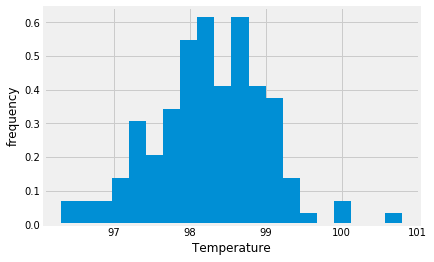

In [8]:
_ = plt.hist(df['temperature'], bins = 20, normed = True)
_ = plt.xlabel ('Temperature')
_ = plt.ylabel ('frequency')

 the distribution is mostly normal but with a little bit of right skew but not sure so looking at ECDF function

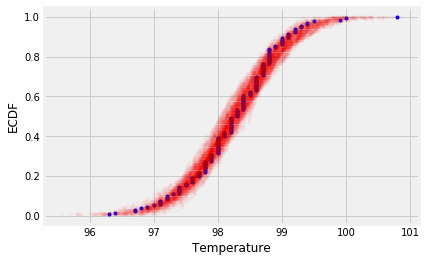

In [10]:
#Define ECDF function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
#Plot the ECDF of observed data
x, y = ecdf(df['temperature'])
_ = plt.plot(x, y, marker = '.', linestyle = 'none', color = 'blue')
#Simulate a normal distribution of the same mean, std, and size, for 100 times, and plot the ecdf
m, s, n = np.mean(df['temperature']), np.std(df['temperature']), len(df['temperature'])
for i in range(100):
    simulation = np.random.normal(m, s, n)
    x, y = ecdf(simulation)
    _ = plt.plot(x, y, marker = '.', alpha = 0.02, linestyle = 'none', color = 'red')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

looks normal looking at ECDF. Now running a normality test

In [11]:
alpha = 0.05
k2, p = stats.normaltest(df['temperature'])
print('p = {}'.format(p))
if p < alpha:
    print('Null hypothesis rejected. This is unlikely a normal distribution.')
else:
    print('Null hypothesis cannot be rejected. This is likely a normal distribution.')

p = 0.2587479863488254
Null hypothesis cannot be rejected. This is likely a normal distribution.



### Is the sample size large? Are the observations independent?
From df.info() above, I know there are 130 samples. This should be large enough for the Central Limit Theorom to apply. The observations are temperatures of different people, which are independent of each other.

### 3.Is the true population mean really 98.6 degrees F

In [12]:
#Shift the data so the mean is actually 98.6
t_shifted = df['temperature'] - np.mean(df['temperature']) + 98.6
#Bootstrap the data 10000 times, and collect means.
bs_mean = np.empty(10000)
for i in range(10000):
    sample = np.random.choice(t_shifted, size = len(t_shifted))
    bs_mean[i] = np.mean(sample)
p = np.sum(abs(bs_mean-98.6) >= abs(np.mean(df['temperature'])-98.6)) / len(bs_mean)
alpha = 0.05
print ('p = {}'.format(p))
if p < alpha:
    print('Null hypothesis rejectd. True population mean is unlikely to be 98.6 degrees F.')
else:
    print('Null hypothesis cannot be rejected. It is likely true population mean is 98.6 degrees F.')

p = 0.0
Null hypothesis rejectd. True population mean is unlikely to be 98.6 degrees F.


Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#### I would use one-sample test, because I am comparing a sample to a number, not comparing two different samples.

In this situation, is it appropriate to use the t or z statistic?
#### Because the sample size is large (130) and sample has normal distribution, I think z test should be used here.

In [14]:
#Calculate z statistic
z = (np.mean(df['temperature']) - 98.6) / np.sqrt(np.var(df['temperature']) / len(df['temperature']))
#Lookup p according to z, because this is two-tailed test, multiply it by 2
p = stats.norm.cdf(z) * 2
print('z = {}\tp = {}'.format(z, p))

z = -5.475925202078116	p = 4.3523151658821886e-08


In [15]:
#Run the t test
t, p = stats.ttest_1samp(df['temperature'], 98.6)
print('t = {}\tp = {}'.format(t, p))

t = -5.4548232923645195	p = 2.4106320415561276e-07


both results show that null hyp to be rejected. Expected as sample sizes are big enuf for z and t test to give similar results

In [17]:
#Draw a sample of 10
sample = np.random.choice(df['temperature'], 10)
#Run z test
z = (np.mean(sample) - 98.6) / np.sqrt(np.var(sample) / len(sample))
p = stats.norm.cdf(z) * 2
print('z = {}\tp = {}'.format(z, p))
#Run t test
t, p = stats.ttest_1samp(sample, 98.6)
print('t = {}\tp = {}'.format(t, p))

z = -2.3996024656566077	p = 0.01641288553502685
t = -2.2764627811292555	p = 0.04884420122389833


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [18]:
#Define any temperature outside 95% confidence interval as "abnormal" 
#Use the bootstrap approach first
sample = np.random.choice(df['temperature'], 100000)
ci =  np.percentile(sample, [2.5, 97.5])
print('Using bootstrap approach,')
print('95% confidence interval is between {} and {} degrees.'.format(ci[0], ci[1]))
print('margin of error is {:.1f} degrees.'.format((ci[1]-ci[0])/2))
#Use frequetist approach
ci = stats.norm.interval(0.95, np.mean(df['temperature']), np.std(df['temperature']))
print('Using frequentist approach,')
print('95% confidence interval is between {:.1f} and {:.1f} degrees.'.format(ci[0], ci[1]))
print('margin of error is {:.1f} degrees.'.format((ci[1]-ci[0])/2))

Using bootstrap approach,
95% confidence interval is between 96.7 and 99.5 degrees.
margin of error is 1.4 degrees.
Using frequentist approach,
95% confidence interval is between 96.8 and 99.7 degrees.
margin of error is 1.4 degrees.


###  6. Is there a significant difference between males and females in normal temperature?

Mean of male and female temperatures are 98.10 and 98.39 degrees.


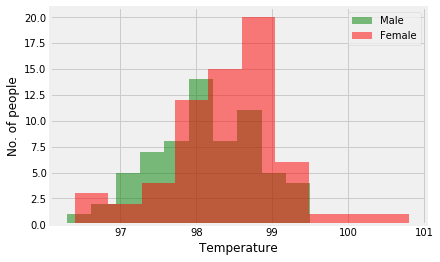

In [21]:
#Take a quick look at the data first
male = df.loc[df.gender == 'M', 'temperature']
female = df.loc[df.gender == 'F', 'temperature']
_ = plt.hist(male, color = 'green', alpha = 0.5)
_ = plt.hist(female, color = 'red', alpha = 0.5)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('No. of people')
_ = plt.legend(['Male', 'Female'])
print('Mean of male and female temperatures are {:.2f} and {:.2f} degrees.'.format(np.mean(male), np.mean(female)))

Female temperature looks slightly higher

####  Testing approach for male and female temperatures

In [23]:
#Run two sample t test, because sample sizes are smaller now. 
t, p = stats.ttest_ind(male, female)
print('t = {}\tp = {}'.format(t, p))
if p < alpha:
    print('Null hypothesis rejected. Temperatures of male and female are likely different.')
else:
    print('Null hypothesis cannot be rejected. Temperatures of male and female are likely the same.')

t = -2.2854345381656103	p = 0.02393188312239561
Null hypothesis rejected. Temperatures of male and female are likely different.


Based on the this dataset of 130 samples, the true mean body temperature of this population is statistically different from 98.6 degree F. However, the difference is likely very small (less than half degree). The mean body temperature of women are statistically higher, though only slightly, than that of men in this population.